In [1]:
from PIL import Image
import numpy as np
import os

def load_data(*path: str, labels: list, skip: bool = True) -> np.ndarray:
    """
    Loads data from a given path and returns a numpy array with the image and label of each file.

    Parameters:
    -----------
    path: str -> Path to the data folder. (can be multiple paths)
    labels: list -> List of labels for each path.
    skip: bool -> Skip files that are not images or cannot be read. (default: True)

    Returns:
    --------
    data_array: np.ndarray -> Numpy array with the image and label of each file.
    """

    # list to store the data. 
    data_array = []
    skipped_files = 0 # Number of skipped files.

    # ---------------------------------------------------
    # Check if the number of paths and labels are equal.
    # If not equal raise an error.
    # ---------------------------------------------------
    if len(path) == len(labels):

        # Loop through the paths and labels.
        for p, l in zip(path, labels):

            # --------------------------
            # Check if the path exists.
            # If not raise an error.
            # --------------------------    
            if os.path.exists(p):
                
                # ----------------------------------------------
                # Loop through the files in the path.
                # Append the image and label to the list.
                # ----------------------------------------------
                for file in os.listdir(p):
                    # Try to catch errors when reading the image.
                    try:
                        # Append the image and label to the list.
                        data_array.append([Image.open(os.path.join(p, file)), l])

                    except Image.UnidentifiedImageError as e:
                        # If skip is True, skip the file.
                        if skip:
                            skipped_files += 1 
                        else:
                            raise e
            else:
                raise FileNotFoundError("Path does not exist")
    else:
        raise ValueError("Number of paths and labels must be equal")
    
    if skipped_files > 0:
        print(f"Skipped {skipped_files} files")

    # Return the numpy array.
    return np.array(data_array, dtype=object)


def resize_images(images: np.array, size: tuple) -> np.array:
    """
    Resizes images in a numpy array.

    Parameters:
    -----------
    images: np.array -> Numpy array with images.
    size: tuple -> Size to resize the images. (width, height)

    Returns:
    --------
    images: np.array -> Numpy array with the resized images.
    """
    
    # Loop through the images and resize them.
    for index, image in enumerate(images):
        images[index][0] = image[0].resize(size)

    # Retruns the numpy array.
    return images

In [11]:
path_fire = './Data/fire/fire/fire-images/'
path_forest = './Data/fire/fire/forest-images/'

dataset = load_data(path_fire, path_forest, labels=['fire', 'forest'])

print(f"dataset len: {len(dataset)}")
print(f"dataset shape: {dataset.shape}")
print(f"dataset fire images: {len([index for index in dataset if index[1] == 'fire'])}")
print(f"dataset forest images: {len([index for index in dataset if index[1] == 'forest'])}")

# TODO: resize images to 256x256
# TODO: Print sample images
# TODO: shuffle dataset
# TODO: split dataset into train, validation and test sets
# TODO: make model
# TODO: train model
# TODO: test model
# TODO: save model

Skipped 389 files
dataset len: 4773
dataset shape: (4773, 2)
dataset fire images: 2111
dataset forest images: 2662


In [13]:
import matplotlib.pyplot as plt

def resize_images(images: np.array, size: tuple) -> np.array:
    """
    Resizes images in a numpy array.

    Parameters:
    -----------
    images: np.array -> Numpy array with images.
    size: tuple -> Size to resize the images. (width, height)

    Returns:
    --------
    images: np.array -> Numpy array with the resized images.
    """
    
    # Loop through the images and resize them.
    for index, image in enumerate(images):
        images[index][0] = image[0].resize(size)

    # Retruns the numpy array.
    return images

dataset = resize_images(dataset, (256, 256))

image = dataset[20][0]

print(image.size)


#plt.imshow(image)

(256, 256)


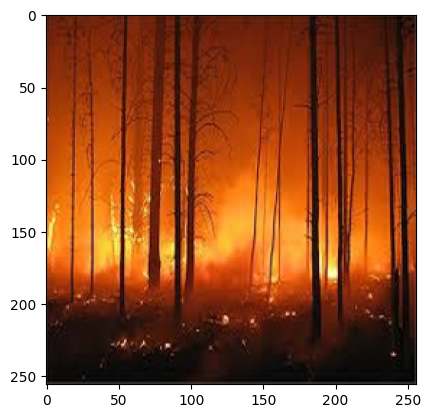

In [14]:
plt.imshow(image)